In [1]:
import math
import random
import numpy as np
import squigglepy as sq
from squigglepy.numbers import K, M, B, T
import matplotlib.pyplot as plt

from copy import copy, deepcopy
from scipy import stats
from pprint import pprint
from datetime import datetime as dt

exec(open('utils.py').read())
print('Loaded')

Loaded


"Frontier lab" is defined as an AI company that has trained a model with an amount of compute that's within one order of magnitude of the world leading model (world leading in terms of most training compute).

In [2]:
RUNS = 10*K

p_merger = 0.05
p_weak_catchup = 0.6 # Enough of a catchup for some of Meta, Mistral, xAI, Yandex, Hugging Face, etc., to become frontier
p_strong_catchup = 0.3 # Enough of a catchup for open source to become frontier


def model_n_labs(end_year):
    n_labs = 4 # Currently OpenAI, Anthropic, Google, and Mistral
    annual_lab_creation_rate = 6 / 4 # OpenAI, Anthropic, Google, Deepmind, Inflection, and Mistral have been various frontier labs over 2020-2024
    annual_lab_leave_rate = 3 / 4 # Google-Deepmind merge, Microsoft-Inflection acquisition, Anthropic dropped from frontier but then came back
    
    china_back_date = int(np.round(~sq.lognorm(1, 15))) + CURRENT_YEAR
    
    if end_year > 2026 and sq.event(p_weak_catchup):
        n_labs += sq.norm(1, 4)
        
    if end_year > 2028 and sq.event(p_strong_catchup):
        n_labs += sq.norm(3, 10)
    
    for y in range(CURRENT_YEAR, end_year):
        if y == china_back_date:
            n_labs *= 1.5

        n_labs += sq.poisson(annual_lab_creation_rate)
        n_labs -= sq.poisson(annual_lab_leave_rate)
        
    return sq.dist_floor(n_labs)
    
print('Loaded')

Loaded


## EOY 2030

## How many frontier labs by EOY 2030? ##


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3531.93it/s]


Writing cache to file `caches/n_labs.sqcache.npy`...
...Cached
{1: 2,
 5: 5,
 10: 6,
 20: 8,
 30: 10,
 40: 11,
 50: 13,
 60: 14,
 70: 16,
 80: 19,
 90: 22,
 95: 25,
 99: 31}


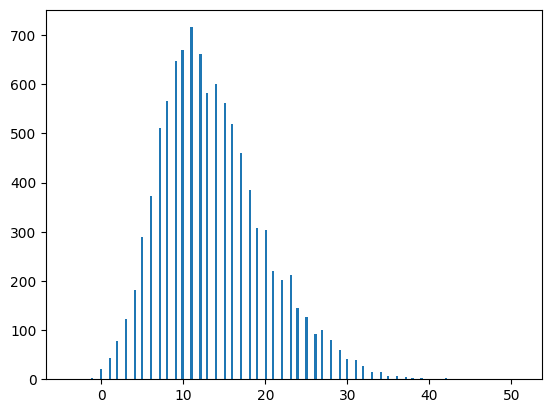

In [3]:
print('## How many frontier labs by EOY 2030? ##')
n_lab_samples = sq.sample(lambda: model_n_labs(2030), n=RUNS, verbose=True, dump_cache_file='caches/n_labs')
pprint(sq.get_percentiles(n_lab_samples, digits=0))
plt.hist(n_lab_samples, bins=200)
plt.show()

In [4]:
np.mean([n > 10 for n in n_lab_samples])

0.6496

## EOY 2025

## How many frontier labs by EOY 2025? ##


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 19689.54it/s]


{1: 1,
 5: 2,
 10: 3,
 20: 4,
 30: 4,
 40: 4,
 50: 5,
 60: 5,
 70: 5,
 80: 6,
 90: 7,
 95: 7,
 99: 8}


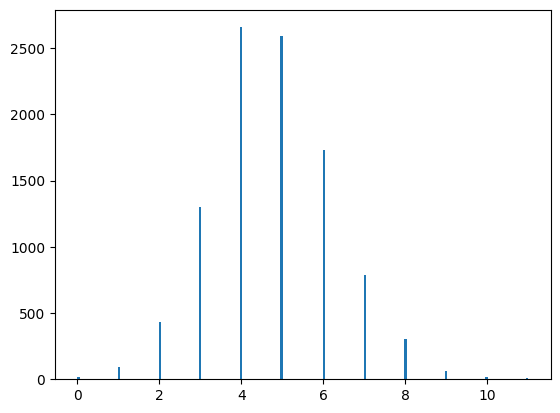

In [5]:
# https://www.metaculus.com/questions/17101/number-of-frontier-ai-labs-on-dec-31-2025/
print('## How many frontier labs by EOY 2025? ##')
n_lab_samples_2026 = sq.sample(lambda: model_n_labs(2026), n=RUNS, verbose=True)
pprint(sq.get_percentiles(n_lab_samples_2026, digits=0))
plt.hist(n_lab_samples_2026, bins=200)
plt.show()

In [14]:
print('<3? => {:.1f}%'.format(np.mean([n < 3 for n in n_lab_samples_2026]) * 100))
print('3? => {:.1f}%'.format(np.mean([n == 3 for n in n_lab_samples_2026]) * 100))
print('4? => {:.1f}%'.format(np.mean([n == 4 for n in n_lab_samples_2026]) * 100))
print('5? => {:.1f}%'.format(np.mean([n == 5 for n in n_lab_samples_2026]) * 100))
print('6? => {:.1f}%'.format(np.mean([n == 6 for n in n_lab_samples_2026]) * 100))
print('7? => {:.1f}%'.format(np.mean([n == 7 for n in n_lab_samples_2026]) * 100))
print('>7? => {:.1f}%'.format(np.mean([n > 7 for n in n_lab_samples_2026]) * 100))

<3? => 5.4%
3? => 13.0%
4? => 26.6%
5? => 25.9%
6? => 17.3%
7? => 7.9%
>7? => 3.9%


In [6]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-04-11 13:42:14.458769
